In [535]:
%reload_ext blackcellmagic
import pandas as pd
import numpy as np
import os
import pprint as pp
import matplotlib.pyplot as plt

# Time Scale Comparison

The time scale exploration started when we found the OECD data. This data allows us to visualize the progess of internet adoption and how it might have affected or simply correlated with other events in a countries development. There was A LOT of data to parse through and find patterns. We decided to showcase positive correlations in both the education, especifically the Research and Development sector, and some economic indicators. 

## Functions

The first function serves the purpose of narrowing down the original data sets to observations we found interesting by the assigned variable OECD gave the end point.

In [536]:
colors = [
    "b","g","r","c","m","y","k","b","g","r", "c","m","y", "k", "b",\
    "g", "y", "k", "b", "g", "r", "c",  "m",  "r",  "c",  "m",  "y",\
    "k",  "b",  "m",  "y",  "k","b",  "g","r",  "c",  "m", "y", "k",\
    "b", "g", "r", "c", "m", "y", "k",
]

def get_var(df, var):
    if "VAR" in df.columns:
        return df[df["VAR"] == var].fillna(value=0)
    elif 'ï»¿"MSTI_VAR"' in df.columns:
        return df[df['ï»¿"MSTI_VAR"'] == var].fillna(value=0)
    elif 'VARIABLE' in df.columns:
        return df[df['VARIABLE'] == var].fillna(0)

This funtion returns a dataframe where the countries are the index and the years are the columns and values are allocated appropiately. So basically we extract the data and put it in a dataframe that will be easy to plot.

In [537]:
def get_values(df):
    countries = list(df.Country.unique())
    data = {}
    if "Time" in df.columns:
        years = list(df.Time.unique())
        for y in years:
            data[str(y)] = {}
            for c in countries:
                value = df.loc[(df["Country"] == c) & (df["Time"] == y)].Value.values
                if value.shape == (1,):
                    data[str(y)][c] = float(value)
                else:
                    data[str(y)][c] = np.nan

    elif "Year" in list(df.columns):
        years = list(df.Year.unique())
        for y in years:
            data[str(y)] = {}
            for c in countries:
                value = df.loc[(df["Country"] == c) & (df["Year"] == y)].Value.values
                if value.shape == (1,):
                    data[str(y)][c] = float(value)
                else:
                    data[str(y)][c] = np.nan

    return pd.DataFrame(data)

In [538]:
def plot2(dataframes, choice, label):
    ind = 0
    for df in dataframes:
        cc = 0
        fig, axs = plt.subplots(1, 4, figsize=(20, 8))

        head = choice.sort_values("2018", ascending=False).head()
        lab_head = list(choice.sort_values("2018", ascending=False).head().index)

        tail = choice.sort_values("2018", ascending=False).tail()
        lab_tail = list(choice.sort_values("2018", ascending=False).tail().index)
        
        for c in list(head.index):
            try:
                idk = axs[0].plot(sorted(choice.columns), choice.loc[c], color=colors[cc], label=c)
            except:
                pass
            try:
                idk3 = axs[1].plot(sorted(df.columns), df.loc[c], color=colors[cc], label=c)
            except:
                pass
            axs[0].legend()
            axs[0].set_title('top 5')
            axs[1].legend()
            cc += 1

        for c in list(tail.index):
            try:
                idk2 = axs[2].plot(sorted(choice.columns), choice.loc[c], color=colors[cc + 5], label=c)
            except:
                pass
            try:
                idk4 = axs[3].plot(sorted(df.columns), df.loc[c], color=colors[cc + 5], label=c)
            except:
                pass

            axs[2].legend()
            axs[2].set_title('bottom 5')
            axs[3].legend()
            cc += 1
            
        plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)
        plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)
        plt.setp(axs[2].xaxis.get_majorticklabels(), rotation=45)
        plt.setp(axs[3].xaxis.get_majorticklabels(), rotation=45)
        plt.suptitle(label + ' vs. ' + str(titles[ind]))
        ind += 1

        plt.show()



## Files

The data we worked with in the time scale comparison came from three different csv files.

In [539]:
path = os.path.join("OECD_data", "broadband.csv")

with open(path) as csv_file:
    og_broadband_df = pd.read_csv(csv_file)
og_bb_df = og_broadband_df[["Country", "VAR", "Time", "Value", "Unit"]]

In [540]:
path = os.path.join("OECD_data", "GERD.csv")

with open(path) as csv_file:
    GERD = pd.read_csv(csv_file)

GERD = GERD[["Country", 'ï»¿"MSTI_VAR"', "MSTI Variables", "Year", "Value"]]

In [541]:
path = os.path.join("OECD_data", "economic_outlook.csv")

with open(path) as csv_file:
    econ_df = pd.read_csv(csv_file)

econ_df = econ_df[["Country", "VARIABLE", "Variable", "Time", "Value"]]

## DataFrame Construction

This area of the code is where the functions presented earlier are used to populate dataframes that will be setup to plot.

In [542]:
fixed100_bb_df = get_var(og_bb_df, "BB-P100-TOT")
mob100_bb_df = get_var(og_bb_df, "BBW-P100-TOT")
fixed100_df = get_values(fixed100_bb_df[fixed100_bb_df["Time"].str.startswith("2")])
mobile100_df = get_values(mob100_bb_df[mob100_bb_df["Time"].str.startswith("2")])

fixed_bb_df = get_var(og_bb_df, "BB-SUBS-TOT")
mob_bb_df = get_var(og_bb_df, "BBW-SUBS-TOT")
fixed_df = get_values(fixed_bb_df[fixed_bb_df["Time"].str.startswith("2")])
mobile_df = get_values(mob_bb_df[mob_bb_df["Time"].str.startswith("2")])

POP = get_var(econ_df, "POP")
population = get_values(POP)

##fixed+mobile in persons
total_bb_df = pd.DataFrame()
for col in fixed_df.columns:
    total_bb_df[col] = fixed_df[col] + mobile_df[col]
    
total100_df = pd.DataFrame()
for col in total_bb_df.columns:
    total100_df[col] = (total_bb_df[col] / population[col]) * 100

total100_df = total100_df.dropna(axis=0)

In [543]:
##Research and Development
gdpRD = get_var(GERD, "G_XGDP")
gdpRD_df = get_values(gdpRD)

VA_PPP = get_var(GERD, "VA_PPP")
val_addedPPP = get_values(VA_PPP)

##economic_indicators
GDP_PPP = get_var(GERD, "GDP_PPP")
gdp_ppp = get_values(GDP_PPP)

UNR = get_var(econ_df, "UNR")
unemployment_rate = get_values(UNR)

GDPV_CAP = get_var(econ_df, "GDPV_CAP")
gdp_percapita = get_values(GDPV_CAP)

GDPVD_CAP = get_var(econ_df, "GDPVD_CAP")
gdp_pcapita_PPP = get_values(GDPVD_CAP)

In [544]:
dataframes = [
    gdp_pcapita_PPP,
    unemployment_rate,
    gdpRD_df,
    val_addedPPP
]
titles = [
    'gdp_pcapita_PPP',
    "unemployment rate",
    "gdp % spent on R&D sector",
    "value added PPP R&D sector"
]

## Visualization

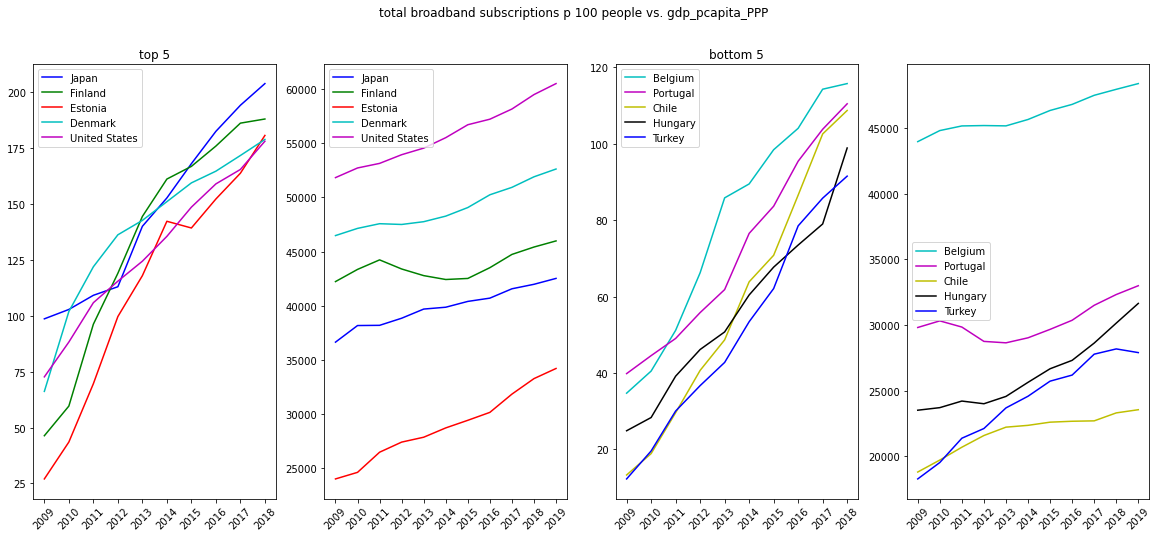

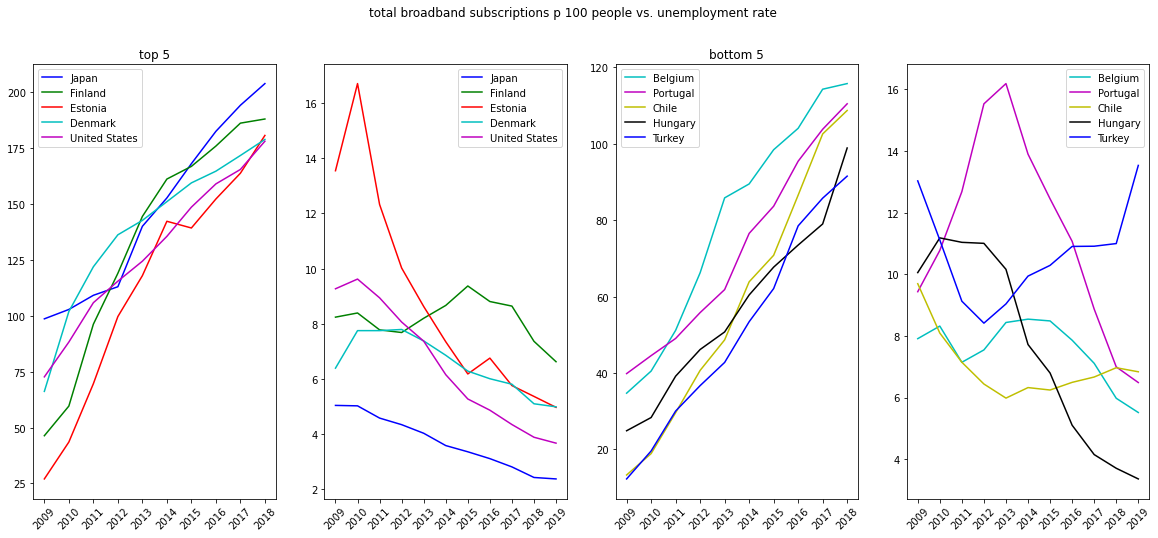

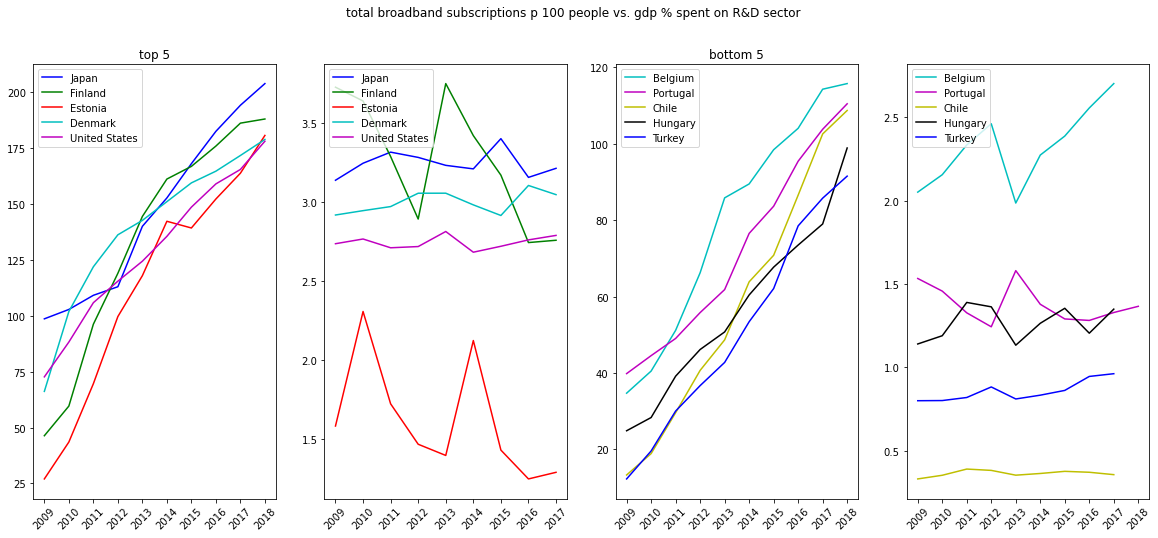

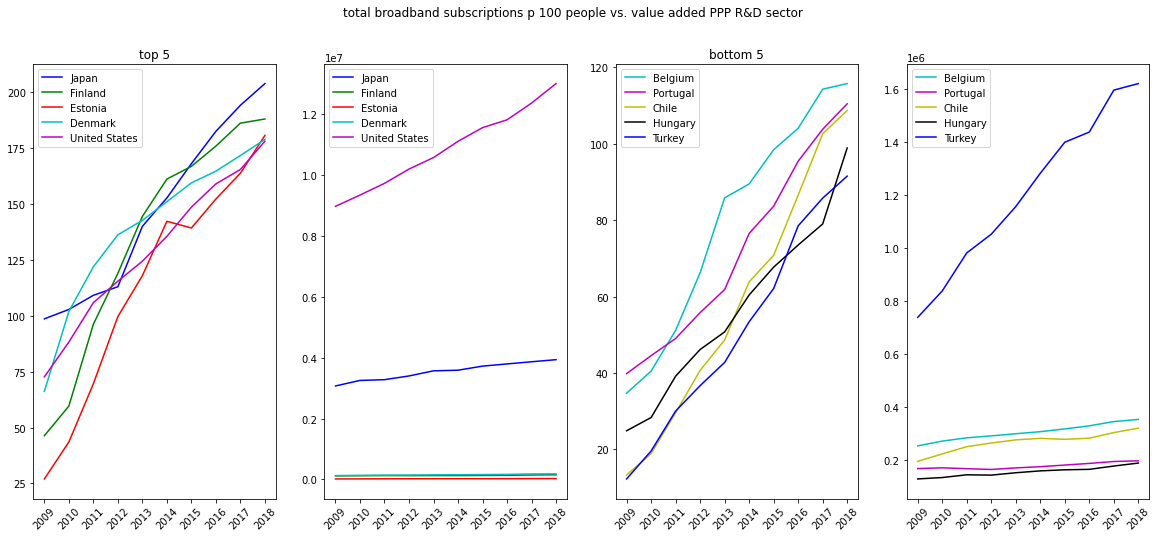

In [545]:
total100plot = plot2(dataframes, total100_df, 'total broadband subscriptions p 100 people')